In [1]:
#Notebook to map voting entropy vs unemployment for counties in Virginia
# color = Democratic/Republican share
# lower panel: size is proportional to population 
# by Charlie Kramer, 2023 
# https://github.com/Charlie-Kramer
# ckramer36@gatech.edu


def entropy(filename):
    '''
    given csv elections data in filename in MIT Election Data and Science Lab format, 
        return dataframe with column for entropy for each race
          = - sum_i p_i log2(p_i)
      and 'color' (share of democratic vote)
      reference for expected data:
        MIT Election Data and Science Lab, 2022, "Precinct-Level Returns 2018 by Individual State", https://doi.org/10.7910/DVN/NVQYMG, Harvard Dataverse, V1, UNF:6:SwtabUdCVrn80v9AOUGuiw== [fileUNF]
        https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/NVQYMG
    '''
    import pandas as pd
    import numpy as np
    
    df0 = pd.read_csv(filename)
    
    office_list = ["US HOUSE","US SENATE","US House","US Senate"]
    df_short = df0.loc[:,["precinct","office","county_name","county_fips","party_detailed","votes"]] \
                            .dropna(subset=["party_detailed"]) \
                            [df0['office'].isin(office_list)]
    df_sums = df_short.groupby(by=["county_name","county_fips","office","party_detailed"]).sum()
    df=df_sums.unstack()
    
    party_list = get_party_names(df)
    print("party_list",party_list)
    
    
    
    df['total_votes'] = 0
    df['entropy'] =0
    
    for party in party_list:
        df['total_votes'] += df.fillna(0)[('votes',party)]
        if party[:3].lower() == 'dem':
            dem = party
        if party[:3].lower() == "rep":
            rep = party
    
    for party in party_list:
        df['entropy'] -= df.fillna(0)[('votes',party)]/df['total_votes'] \
                        *np.log2(df.fillna(1)[('votes',party)]/df['total_votes'])  
    
    
    df['color'] = 1 - df[('votes',rep)]/df['total_votes']    
    df['color'] = df['color'].fillna(df[('votes',dem)]/df['total_votes'])


    df.columns = [''.join(col) for col in df.columns.values]
        
    return df.reset_index()

def get_party_names(df):
    cols = df.columns.tolist()
    party_names=[]
    for col in cols:
        if type(col) is tuple and col[0]=='votes':
            party_names.append(col[1])
            
    return party_names


party_list ['DEMOCRAT', 'LIBERTARIAN', 'REPUBLICAN']
Index(['county_name', 'county_fips', 'office', 'votesDEMOCRAT',
       'votesLIBERTARIAN', 'votesREPUBLICAN', 'total_votes', 'entropy',
       'color'],
      dtype='object')


/var/folders/12/lnw3jf817_x0g5w5q1l9d8x00000gn/T/ipykernel_20672/3016905580.py:22: DtypeWarning: Columns (2,3,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df0 = pd.read_csv(filename)
/var/folders/12/lnw3jf817_x0g5w5q1l9d8x00000gn/T/ipykernel_20672/3016905580.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_short = df0.loc[:,["precinct","office","county_name","county_fips","party_detailed","votes"]] \


count    266.000000
mean       0.958337
std        0.161735
min        0.000000
25%        0.917355
50%        0.992145
75%        1.053043
max        1.189608
Name: entropy, dtype: float64

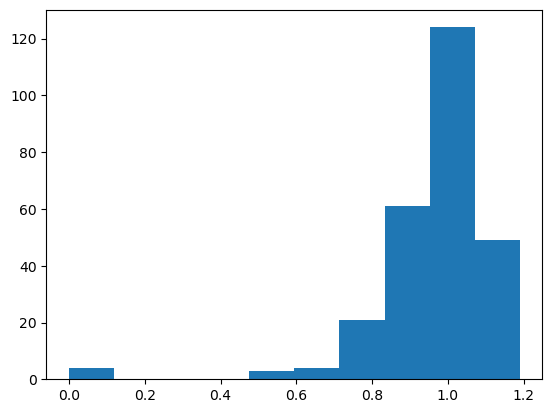

In [2]:
import matplotlib.pyplot as plt
file = 'data/2018-va-precinct-general.csv'   
df_2018 = entropy(file)
print(df_2018.columns)
plt.hist(df_2018['entropy'])
df_2018['entropy'].describe()

       county_name  county_fips     office  votesDEMOCRAT  votesLIBERTARIAN  \
0         ACCOMACK        51001   US HOUSE         5729.0               NaN   
1         ACCOMACK        51001  US SENATE         5997.0             135.0   
2        ALBEMARLE        51003   US HOUSE        34409.0               NaN   
3        ALBEMARLE        51003  US SENATE        35701.0            1161.0   
4  ALEXANDRIA CITY        51510   US HOUSE        52006.0               NaN   

   votesREPUBLICAN  total_votes   entropy     color  
0           7025.0      12754.0  0.992539  0.449192  
1           6605.0      12737.0  1.072478  0.481432  
2          18807.0      53216.0  0.937076  0.646591  
3          16371.0      53233.0  1.030074  0.692465  
4          13569.0      65575.0  0.735561  0.793077  
party_list ['DEMOCRAT', 'INDEPENDENT', 'REPUBLICAN']


/var/folders/12/lnw3jf817_x0g5w5q1l9d8x00000gn/T/ipykernel_20672/3016905580.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_short = df0.loc[:,["precinct","office","county_name","county_fips","party_detailed","votes"]] \


(array([ 27.,   0.,   0.,   0.,   3.,   4.,  16.,  68., 143.,   5.]),
 array([0.        , 0.11467869, 0.22935738, 0.34403607, 0.45871476,
        0.57339345, 0.68807214, 0.80275083, 0.91742952, 1.03210821,
        1.1467869 ]),
 <BarContainer object of 10 artists>)

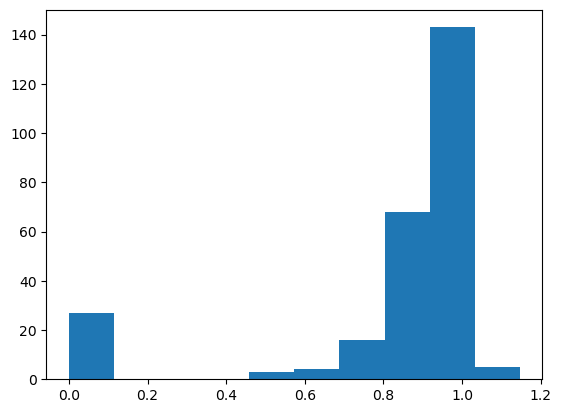

In [3]:
print(df_2018.head())
import matplotlib.pyplot as plt
import pandas as pd
file = 'data/2020-va-precinct-general.csv'   
df_2020 = entropy(file)
plt.hist(df_2020['entropy'])


/var/folders/12/lnw3jf817_x0g5w5q1l9d8x00000gn/T/ipykernel_20672/3016905580.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_short = df0.loc[:,["precinct","office","county_name","county_fips","party_detailed","votes"]] \


party_list ['Democrat', 'Republican']


(array([ 1.,  0.,  0.,  0.,  0.,  1.,  2., 22., 36., 71.]),
 array([0.        , 0.09999994, 0.19999988, 0.29999982, 0.39999975,
        0.49999969, 0.59999963, 0.69999957, 0.79999951, 0.89999945,
        0.99999939]),
 <BarContainer object of 10 artists>)

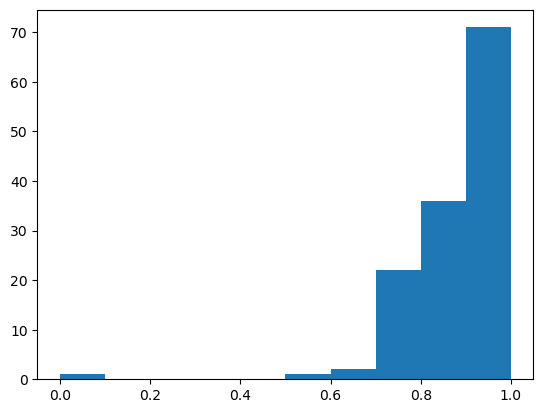

In [4]:
file = "data/MIT_data_2016_HouseSenate_merged.csv"
df_2016 = entropy(file)
plt.hist(df_2016['entropy'])

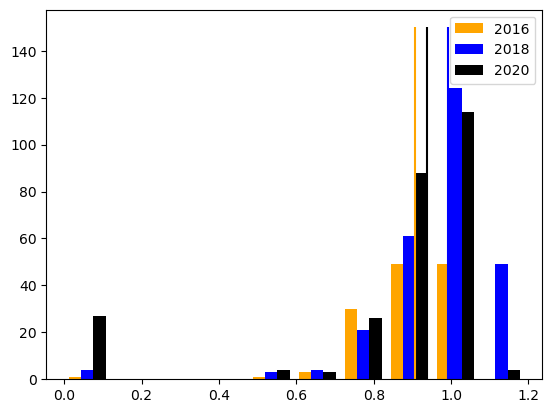

In [5]:
plt.hist([df_2016['entropy'],df_2018["entropy"],df_2020["entropy"]],color=['orange','blue','black'])
plt.legend(["2016","2018","2020"])
median_2016 = df_2016['entropy'].median()
plt.vlines(median_2016,0,150,'orange')
median_2018 = df_2018['entropy'].median()
plt.vlines(median_2018,0,150,'blue')
median_2020 = df_2020['entropy'].median()
plt.vlines(median_2020,0,150,'black')
plt.show()

In [6]:
# load u data
import pandas as pd
df_u = pd.read_csv(
  'data/la.data.54.Virginia dat',
  sep = '\s+'
)
df_u["county_fips"] = df_u["series_id"].str[5:10]
df_u2 = df_u.loc[((df_u['year']==2016) | (df_u['year']==2018) | (df_u['year'] ==2020)) & (df_u['period']=="M06") 
             & (df_u['series_id'].str[-2:]=='03') & (df_u['series_id'].str[:3]=='LAU')
             & (df_u['series_id'].str[3:5]=='CN')] 

In [7]:
#merge datasets: 2016
df_2016 = df_2016.astype({'county_fips':'int'})
df_2016['county_fips'] = df_2016['county_fips'].astype(int)
df_u2['county_fips'] = df_u2['county_fips'].astype(int)
df_u2_2016 = df_u2.loc[df_u2["year"]==2016]
df_2016_merged = pd.merge(left=df_2016,right=df_u2_2016,how="left",on="county_fips")

/var/folders/12/lnw3jf817_x0g5w5q1l9d8x00000gn/T/ipykernel_20672/2158125074.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_u2['county_fips'] = df_u2['county_fips'].astype(int)


In [8]:
#merge datasets: 2018
df_2018 = df_2018.astype({'county_fips':'int'})
df_2018['county_fips'] = df_2018['county_fips'].astype(int)
df_u2['county_fips'] = df_u2['county_fips'].astype(int)
df_u2_2018 = df_u2.loc[df_u2["year"]==2018]
df_2018_merged = pd.merge(left=df_2018,right=df_u2_2018,how="left",on="county_fips")

/var/folders/12/lnw3jf817_x0g5w5q1l9d8x00000gn/T/ipykernel_20672/3630318072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_u2['county_fips'] = df_u2['county_fips'].astype(int)


In [9]:
#merge datasets: 2020
df_2020 = df_2020.astype({'county_fips':'int'})
df_2020['county_fips'] = df_2020['county_fips'].astype(int)
df_u2['county_fips'] = df_u2['county_fips'].astype(int)
df_u2_2020 = df_u2.loc[df_u2["year"]==2020]
df_2020_merged = pd.merge(left=df_2020,right=df_u2_2020,how="left",on="county_fips")

/var/folders/12/lnw3jf817_x0g5w5q1l9d8x00000gn/T/ipykernel_20672/125816963.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_u2['county_fips'] = df_u2['county_fips'].astype(int)


In [10]:
#try with bokeh https://mybinder.org/v2/gh/bokeh/bokeh-notebooks/master?filepath=tutorial%2F00%20-%20Introduction%20and%20Setup.ipynb
#https://stackoverflow.com/questions/50013378/how-to-draw-a-circle-plot-the-linearcolormapper-using-python-bokeh
from bokeh.models import ColumnDataSource, LinearColorMapper, ColorBar
from bokeh.models.widgets import Div
from bokeh.plotting import figure, show
from bokeh.palettes import brewer
from bokeh.layouts import layout
plot_x_range = [0,22]
plot_y_range = [-0.1,1.25]
plot_width = 450
plot_height = 300


In [11]:
#palette from red to blue?
# space out?

df_graph = df_2016_merged

year = "2016"
plot_title = year

source = ColumnDataSource(data=df_graph)

TOOLTIPS = [
    ("county", "@county_name"),
    ("urate,entropy,color","(@value,@entropy,@color)")
]


p16a = figure(width=plot_width, height=plot_height, tooltips=TOOLTIPS,
           title = plot_title,x_range=plot_x_range,y_range=plot_y_range)
p16a.xaxis.axis_label = "Unemployment Rate"
p16a.yaxis.axis_label = "Entropy"

# palette was "Viridis256"
color_map = LinearColorMapper(palette=["red","purple","blue"], 
                             low = min(df_graph["color"]), 
                             high = max(df_graph["color"]))


from bokeh.models import ColorBar
bar = ColorBar(color_mapper=color_map, location=(0,0),title="Party")
p16a.add_layout(bar, "right")
p16a.circle('value', 'entropy', size=20, source=source,fill_color={"field":"color", "transform":color_map})



GlyphRenderer(id='1044', ...)

In [12]:
#palette from red to blue?
# space out?

df_graph = df_2018_merged

year = "2018"
plot_title = year

source = ColumnDataSource(data=df_graph)

TOOLTIPS = [
    ("county", "@county_name"),
    ("urate,entropy,color","(@value,@entropy,@color)")
]


p18a = figure(width=plot_width, height=plot_height, tooltips=TOOLTIPS,
           title = plot_title,x_range=plot_x_range,y_range=plot_y_range)
p18a.xaxis.axis_label = "Unemployment Rate"
p18a.yaxis.axis_label = "Entropy"

# palette was "Viridis256"
color_map = LinearColorMapper(palette=["red","purple","blue"], 
                             low = min(df_graph["color"]), 
                             high = max(df_graph["color"]))


from bokeh.models import ColorBar
bar = ColorBar(color_mapper=color_map, location=(0,0),title="Party")
p18a.add_layout(bar, "right")
p18a.circle('value', 'entropy', size=20, source=source,fill_color={"field":"color", "transform":color_map})



GlyphRenderer(id='1090', ...)

In [13]:
#palette from red to blue?
# space out?

df_graph = df_2020_merged

year = "2020"
plot_title = year

source = ColumnDataSource(data=df_graph)

TOOLTIPS = [
    ("county", "@county_name"),
    ("urate,entropy,color","(@value,@entropy,@color)")
]


p20a = figure(width=plot_width, height=plot_height, tooltips=TOOLTIPS,
           title = plot_title,x_range=plot_x_range,y_range=plot_y_range)
p20a.xaxis.axis_label = "Unemployment Rate"
p20a.yaxis.axis_label = "Entropy"

# palette was "Viridis256"
color_map = LinearColorMapper(palette=["red","purple","blue"], 
                             low = min(df_graph["color"]), 
                             high = max(df_graph["color"]))


from bokeh.models import ColorBar
bar = ColorBar(color_mapper=color_map, location=(0,0),title="Party")
p20a.add_layout(bar, "right")
p20a.circle('value', 'entropy', size=20, source=source,fill_color={"field":"color", "transform":color_map})


GlyphRenderer(id='1136', ...)

In [14]:
# population data: merge with 2016
df_pop = pd.read_excel("data/co-est2021-pop-51-fips-added.xlsx")
df_pop = df_pop.rename(columns={2020: "pop2020",2021:"pop2021"})
df_2016_merged_pop = pd.merge(left=df_2016_merged,right=df_pop,how="left",left_on="county_fips",right_on="FIPS")
import numpy as np
df_2016_merged_pop["circle_size"] = np.sqrt(df_2016_merged_pop["pop2020"]/100000)/np.pi

In [15]:
# population data: merge with 2018
df_pop = pd.read_excel("data/co-est2021-pop-51-fips-added.xlsx")
df_pop = df_pop.rename(columns={2020: "pop2020",2021:"pop2021"})
df_2018_merged_pop = pd.merge(left=df_2018_merged,right=df_pop,how="left",left_on="county_fips",right_on="FIPS")
import numpy as np
df_2018_merged_pop["circle_size"] = np.sqrt(df_2018_merged_pop["pop2020"]/100000)/np.pi

In [16]:
# population data: merge with 2020
df_pop = pd.read_excel("data/co-est2021-pop-51-fips-added.xlsx")
df_pop = df_pop.rename(columns={2020: "pop2020",2021:"pop2021"})
df_2020_merged_pop = pd.merge(left=df_2020_merged,right=df_pop,how="left",left_on="county_fips",right_on="FIPS")
import numpy as np
df_2020_merged_pop["circle_size"] = np.sqrt(df_2020_merged_pop["pop2020"]/100000)/np.pi

In [17]:
df_graph = df_2016_merged_pop

year = "2016"
plot_title = year+", Size Proportional to Population"
source = ColumnDataSource(data=df_graph)

TOOLTIPS = [
    ("county", "@county_name"),
    ("urate,entropy,color","(@value,@entropy,@color)")
]

p16b = figure(width=plot_width, height=plot_height, tooltips=TOOLTIPS,
           title = plot_title,x_range=plot_x_range,y_range=plot_y_range)
p16b.xaxis.axis_label = "Unemployment Rate"
p16b.yaxis.axis_label = "Entropy"

color_map = LinearColorMapper(palette=["red","purple","blue"], 
                             low = min(df_graph["color"]), 
                             high = max(df_graph["color"]))

from bokeh.models import ColorBar
bar = ColorBar(color_mapper=color_map, location=(0,0),title="Party")
p16b.add_layout(bar, "right")
p16b.circle('value', 'entropy', size=20, source=source,fill_color={"field":"color", "transform":color_map},
        radius = 'circle_size')


GlyphRenderer(id='1182', ...)

In [18]:
df_graph = df_2018_merged_pop

year = "2018"
plot_title = year+", Size Proportional to Population"

source = ColumnDataSource(data=df_graph)

TOOLTIPS = [
    ("county", "@county_name"),
    ("urate,entropy,color","(@value,@entropy,@color)")
]

p18b = figure(width=plot_width, height=plot_height, tooltips=TOOLTIPS,
           title = plot_title,x_range=plot_x_range,y_range=plot_y_range)
p18b.xaxis.axis_label = "Unemployment Rate"
p18b.yaxis.axis_label = "Entropy"

color_map = LinearColorMapper(palette=["red","purple","blue"], 
                             low = min(df_graph["color"]), 
                             high = max(df_graph["color"]))

from bokeh.models import ColorBar
bar = ColorBar(color_mapper=color_map, location=(0,0),title="Party")
p18b.add_layout(bar, "right")
p18b.circle('value', 'entropy', source=source,fill_color={"field":"color", "transform":color_map},
        radius = 'circle_size')


GlyphRenderer(id='1228', ...)

In [19]:
df_graph = df_2020_merged_pop

year = "2020"
plot_title = year+", Size Proportional to Population"

source = ColumnDataSource(data=df_graph)

TOOLTIPS = [
    ("county", "@county_name"),
    ("urate,entropy,color","(@value,@entropy,@color)")
]

p20b = figure(width=plot_width, height=plot_height, tooltips=TOOLTIPS,
           title = plot_title,x_range=plot_x_range,y_range=plot_y_range)
p20b.xaxis.axis_label = "Unemployment Rate"
p20b.yaxis.axis_label = "Entropy"

color_map = LinearColorMapper(palette=["red","purple","blue"], 
                             low = min(df_graph["color"]), 
                             high = max(df_graph["color"]))

from bokeh.models import ColorBar
bar = ColorBar(color_mapper=color_map, location=(0,0),title="Party")
p20b.add_layout(bar, "right")
p20b.circle('value', 'entropy', size=20, source=source,fill_color={"field":"color", "transform":color_map},
        radius = 'circle_size')


GlyphRenderer(id='1274', ...)

In [20]:
description = Div(width=450,
                  text="""<b>Virginia, Voting Entropy vs Unemployment by County</b> 
                  <br>Sources: <a href="https://electionlab.mit.edu/data">MIT Election Lab</a>, 
                  <a href="https://www.census.gov/">Census Bureau</a>
                  <br>Lower entropy = more polarized <a href="https://github.com/Charlie-Kramer/va_voting_entropy">Back to code</a>
                  """)

p = layout([[description],[p16a, p18a, p20a], [p16b, p18b, p20b]])

show(p)

In [22]:
from bokeh.embed import file_html
from bokeh.resources import CDN

html = file_html(p,CDN)

f=open("index.html","w")
f.write(html)
f.close

<function TextIOWrapper.close()>